# NAIVE BAYES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

### Data

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
print(dataset.columns)

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')


### Storing Features & Targets

In [4]:
X = dataset.iloc[:, [1, 2, 3]].values #fts
y = dataset.iloc[:, -1].values #target

### Encoding Categorical variable using Label Encoding

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0]) # encode and give the final encoded data

In [6]:
X,y

(array([[1, 19, 19000],
        [1, 35, 20000],
        [0, 26, 43000],
        ...,
        [0, 50, 20000],
        [1, 36, 33000],
        [0, 49, 36000]], dtype=object),
 array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
        1, 1,

### Splitting the Dataset into training and test dataset

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 78)

### Scaling the Dataset

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) # it will learn mu and sigma and transform my data to (x-mu)/sigma
X_test = sc.transform(X_test)

In [9]:
dataset.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


### Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002108F065E20>,
      dtype=object)

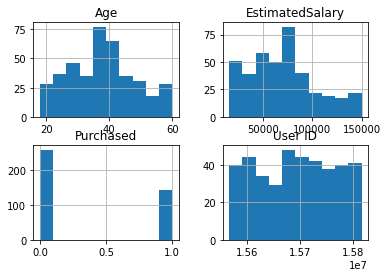

In [10]:
dataset.hist(bins = 10)

### Fitting the model

In [11]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB() #if my fts are continuous - NB will assume the fts belong to normal (gaussian) distribution
classifier.fit(X_train, y_train) #compute the probabilities (likelihood, prior and marginilsation)

GaussianNB()

### Predicting target on test dataset by our model

In [12]:
y_pred  =  classifier.predict(X_test)
#y_pred
classifier.predict_proba(X_test)

array([[0.01814415, 0.98185585],
       [0.98863049, 0.01136951],
       [0.75087793, 0.24912207],
       [0.98600252, 0.01399748],
       [0.84693705, 0.15306295],
       [0.79415706, 0.20584294],
       [0.79451056, 0.20548944],
       [0.72274129, 0.27725871],
       [0.918967  , 0.081033  ],
       [0.78912154, 0.21087846],
       [0.02393676, 0.97606324],
       [0.10964916, 0.89035084],
       [0.28402097, 0.71597903],
       [0.68915736, 0.31084264],
       [0.91762326, 0.08237674],
       [0.98552777, 0.01447223],
       [0.84693705, 0.15306295],
       [0.66982628, 0.33017372],
       [0.98630084, 0.01369916],
       [0.91563979, 0.08436021],
       [0.45605988, 0.54394012],
       [0.3014284 , 0.6985716 ],
       [0.31444813, 0.68555187],
       [0.39271347, 0.60728653],
       [0.93266951, 0.06733049],
       [0.01508265, 0.98491735],
       [0.58973328, 0.41026672],
       [0.65663702, 0.34336298],
       [0.84920989, 0.15079011],
       [0.42232696, 0.57767304],
       [0.

In [13]:
nb = pd.DataFrame(X_test)
nb['Actual Target'] =y_test
nb['Prediction'] = y_pred

In [14]:
nb

,0,1,2,Actual Target,Prediction
0,-0.945247,1.400147,1.326091,0,1
1,1.057925,-1.362635,-0.161420,0,0
2,1.057925,0.161658,0.246916,0,0
3,1.057925,-1.362635,-1.415597,0,0
4,1.057925,0.066390,-0.219754,0,0
...,...,...,...,...,...
75,-0.945247,-0.219415,-0.103087,0,0
76,1.057925,-1.172098,0.305250,0,0
77,-0.945247,1.685952,1.792761,1,1
78,-0.945247,0.923805,1.121922,1,1


### Predicting target on random value of features

In [15]:
# I am onboarding a new person who is male, 28 years old, 45000
classifier.predict(sc.transform([[1,28,50000]]))

array([0], dtype=int64)

### Calculating Evaluation Metrics

Confusion Matrix
[[45  5]
 [ 3 27]]
accuracy_score 0.9
the area under the ROC curve 0.9513333333333334
f1 score 0.870967741935484


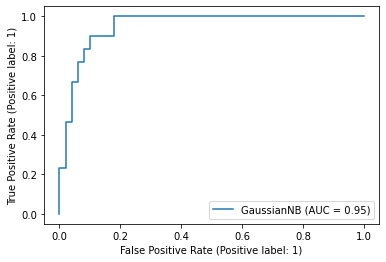

In [16]:
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score, roc_auc_score, classification_report, RocCurveDisplay
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)
ac = accuracy_score(y_test,y_pred)
print('accuracy_score',ac)
print('the area under the ROC curve',roc_auc_score(y_test, classifier.predict_proba(X_test)[:, 1]))
# #print(classification_report(y_test, y_pred))
RocCurveDisplay.from_estimator(classifier, X_test, y_test) 
print('f1 score',f1_score(y_test,y_pred))